## 12. Reweighting techniques

### 12.1 Exercise: Change of measure
For a canonical distribution $\pi$ at inverse temperature $\beta$, prove the second equality of:

$$
\langle O \rangle_\pi = \langle O \frac{\pi}{g} \rangle_g = \frac{\langle O e^{-\beta E}/g \rangle_g}{\langle e^{-\beta E}/g \rangle_g}
$$

For a canonical distribution $\pi(C)=\frac{e^{-\beta E(C)}}{\sum_{C'}e^{-\beta E(C')}} $ we have:

$$
\begin{aligned} 
\langle O \rangle _\pi &= \left\langle O\frac{\pi}{g}\right\rangle_g \\
&= \sum_C O(C)\frac{\pi(c)}{g(C)}g(C) \\
&= \sum_C O(C)\frac{e^{-\beta E(C)}}{\sum_{C'}e^{-\beta E(C')}}\frac{1}{g(C)}g(C) \\
&= \frac{1}{\sum_{C'}e^{-\beta E(C')}}\sum_C O(C)\frac{e^{-\beta E(C)}}{g(C)}g(C) \\
&= \frac{1}{\sum_{C'}\frac{e^{-\beta E(C')}}{g(C')}g(C')}\sum_C O(C)\frac{e^{-\beta E(C)}}{g(C)}g(C) \\
&= \frac{1}{\langle e^{-\beta E}/g \rangle_g}\langle O e^{-\beta E}/g \rangle_g 
\end{aligned}
$$
which is what we want to prove.

### 12.2 Exercise: Single Histogram Method
Choose a system, for example, the two-dimensional Ising model, and run $K\geq3$ simulations at different temperatures, collecting data on the energy of samples.

Apply the single histogram method to extrapolate the average internal energy $U(\beta)=\langle E\rangle_\beta$ from data at one $\beta_i$ to arange of $\beta$ covering the selected $\beta_1,\ldots,\beta_K$ (i.e, here ignore the data from $\beta_k\neq\beta_i)$. Comment on the overlap between this prediction and the usual evaluation of the internal energy $U(\beta_k)$ obtained directly from data at $\beta_k.$

Is the extrapolated $U$ getting worse when $\beta$ departs too much from $\beta_i?$ How does the prediction $U(\beta)$ change with the $\beta_i?$


#### The histogram method [source](https://www.scielo.br/j/bjp/a/NbwwJnKFN7KB9kbrDrvsXtr/?lang=en)

In a classical system the thermal average of a quantity A at an inverse termperature b is the sum over all configurations:
 
$$
\langle A(\beta)\rangle=\frac{1}{Z}\sum_{c}A_{c}e^{-\beta E_{c}},
$$

where $A_\mathrm{c}$ is the measurement of the observable A in the configuration $c$ and $E_\mathrm{c}$ the energy of that configuration. In a Monte Carlo simulations, a subset of $M$ configurations $\{c_i\}$, drawn with probability $p_c= e^{b E_c}$ is sampled, and the thermal average estimated by the sample mean

$$
\langle A(\beta)\rangle\approx\overline{A}=\frac{1}{M}\sum_{i}A_{c_{i}}.
$$

This sampling scheme gives results only for the inverse temperature b, but actually there is much more information available than just the simple average. Indeed, in the search for a phase transition a range of temperatures needs to be explored and information at a nearby inverse temperature b$_c$ can be obtained from a simulation performed at b. This is done by reweighting the configurations sampled with the Boltzmann weight $p_c= e^{ b E_)}$ to obtain averages for the Boltzmann weight $p_c^{\prime}= e^{b_c E_c}$.

How to use histograms (probability distributions) for reweighting?
- During a MC run (at $\beta_c)$, measure histogram $N_{\beta_c}(E).$ 
- We know that $N_{\beta}(E)\propto n(E)\exp(-\beta E)$, where $n(E)$ is the number
 of states at energy $E.$
- Thus, we can reweight $h{:}N_{\beta}(E)\propto N_{\beta_{c}}(E)\exp[-(\beta-\beta_{c})E].$
- Finally, if $O(E)$ is a function of energy, we can calculate

$$
\langle O\rangle_\beta=\frac{\sum_EO(E)N_\beta(E)}{\sum_E N_\beta(E)}=\frac{\sum_EO(E)N_{\beta_c}(E)\exp[-(\beta-\beta_c)E]}{\sum_E N_{\beta_c}(E)\exp[-(\beta-\beta_c)E]}
$$

The parameters of the simulations are: 

| Parameter   | Value   |
|-------------|---------|
| d           | 2       |
| nx          | 20      |
| ny          | 20      |
| nsteps      | 10000   |
| burnInSteps | 0       |
| $\beta$     | [2.26918531, 2.45828409,<br> 2.64738287, 2.83648164,<br> 3.02558042, 3.2146792 ,<br> 3.40377797]|


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# collect data from simulations
file_names = ["single_hist_1.txt", "single_hist_2.txt", "single_hist_3.txt",
              "single_hist_4.txt", "single_hist_5.txt", "single_hist_6.txt",
              "single_hist_7.txt"]

data = []

for file_name in file_names:
    with open(file_name, 'r') as file:
        file_data = np.loadtxt(file)
        data.append(file_data)

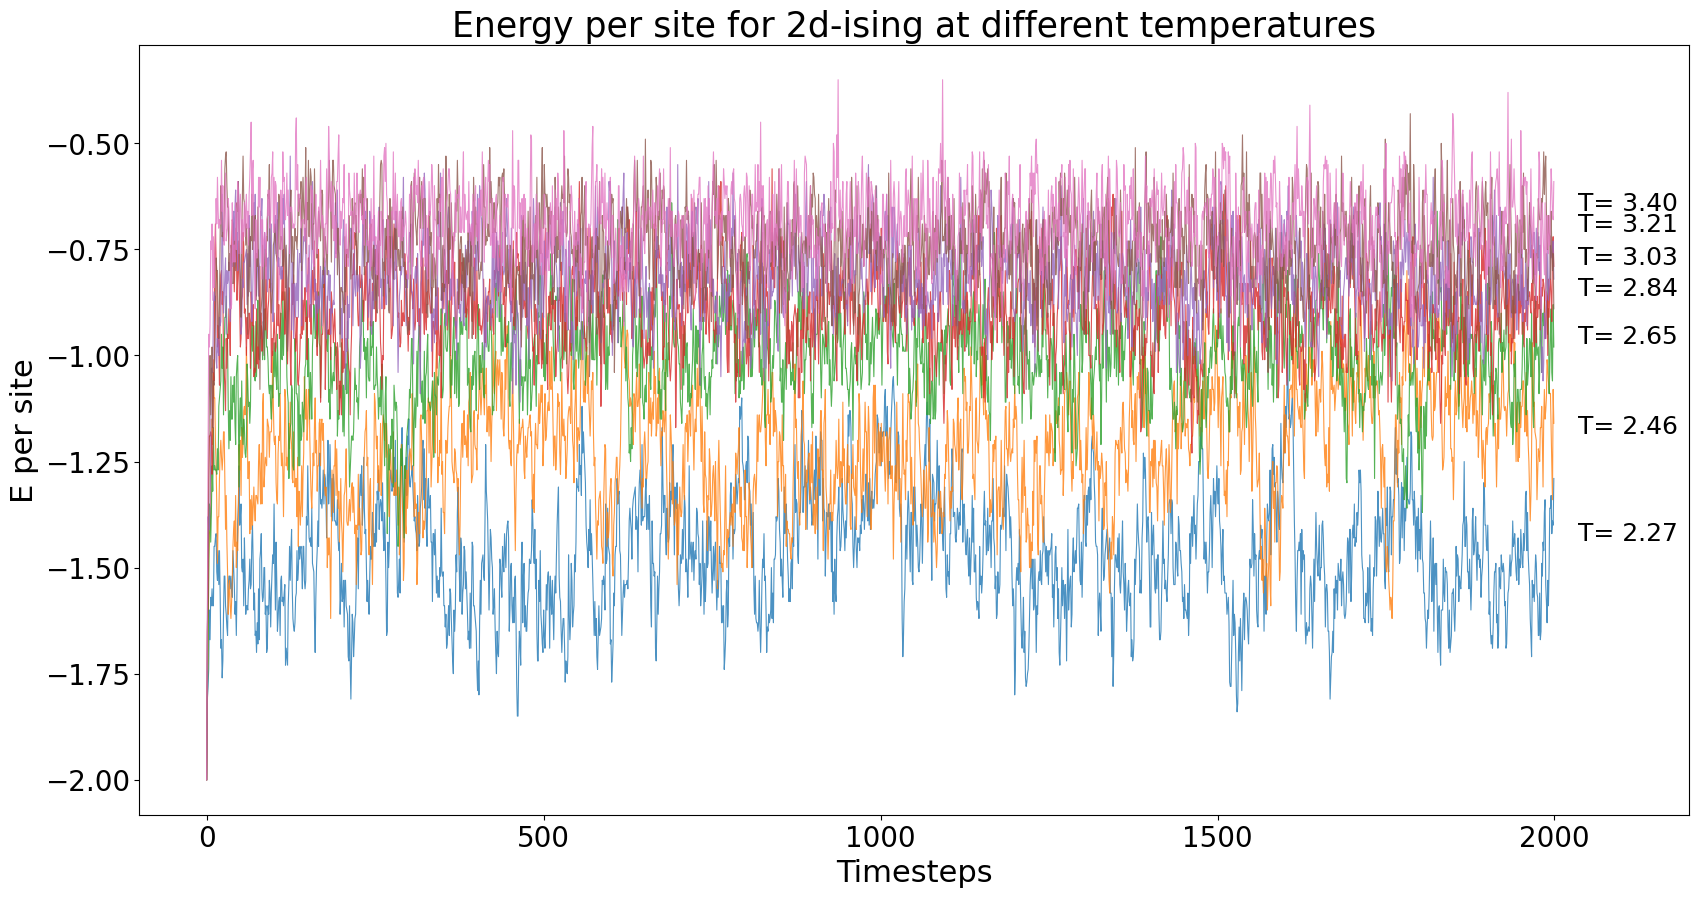

In [3]:
# define the used range of temperatures
T_critic = 2.0/np.log(1.0 + np.sqrt(2.0))
T = np.linspace(T_critic, 1.5*T_critic, 7)

# how many timesteps for the plot
ts_plot = 2000

# plot the E at different temperature
plt.figure(figsize=(20,10))
for i in range(len(data)):
    T_cur = T[i]
    plt.plot(data[i][:ts_plot,0],data[i][:ts_plot,1], linewidth = 0.8, alpha=0.8) #plot energy vs timesteps 

    avg_height = np.mean(data[i][:ts_plot, 1])
    plt.annotate(f'T= {T_cur:.2f}', xy=(data[i][ts_plot + 150, 0], avg_height), xytext=(-20, 10),
                 textcoords='offset points', fontsize=18, ha='center', color='black')
plt.title("Energy per site for 2d-ising at different temperatures", fontsize=25)
plt.xlim(-100,ts_plot+200)
plt.xlabel('Timesteps', fontsize=22)
plt.ylabel('E per site', fontsize=22)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

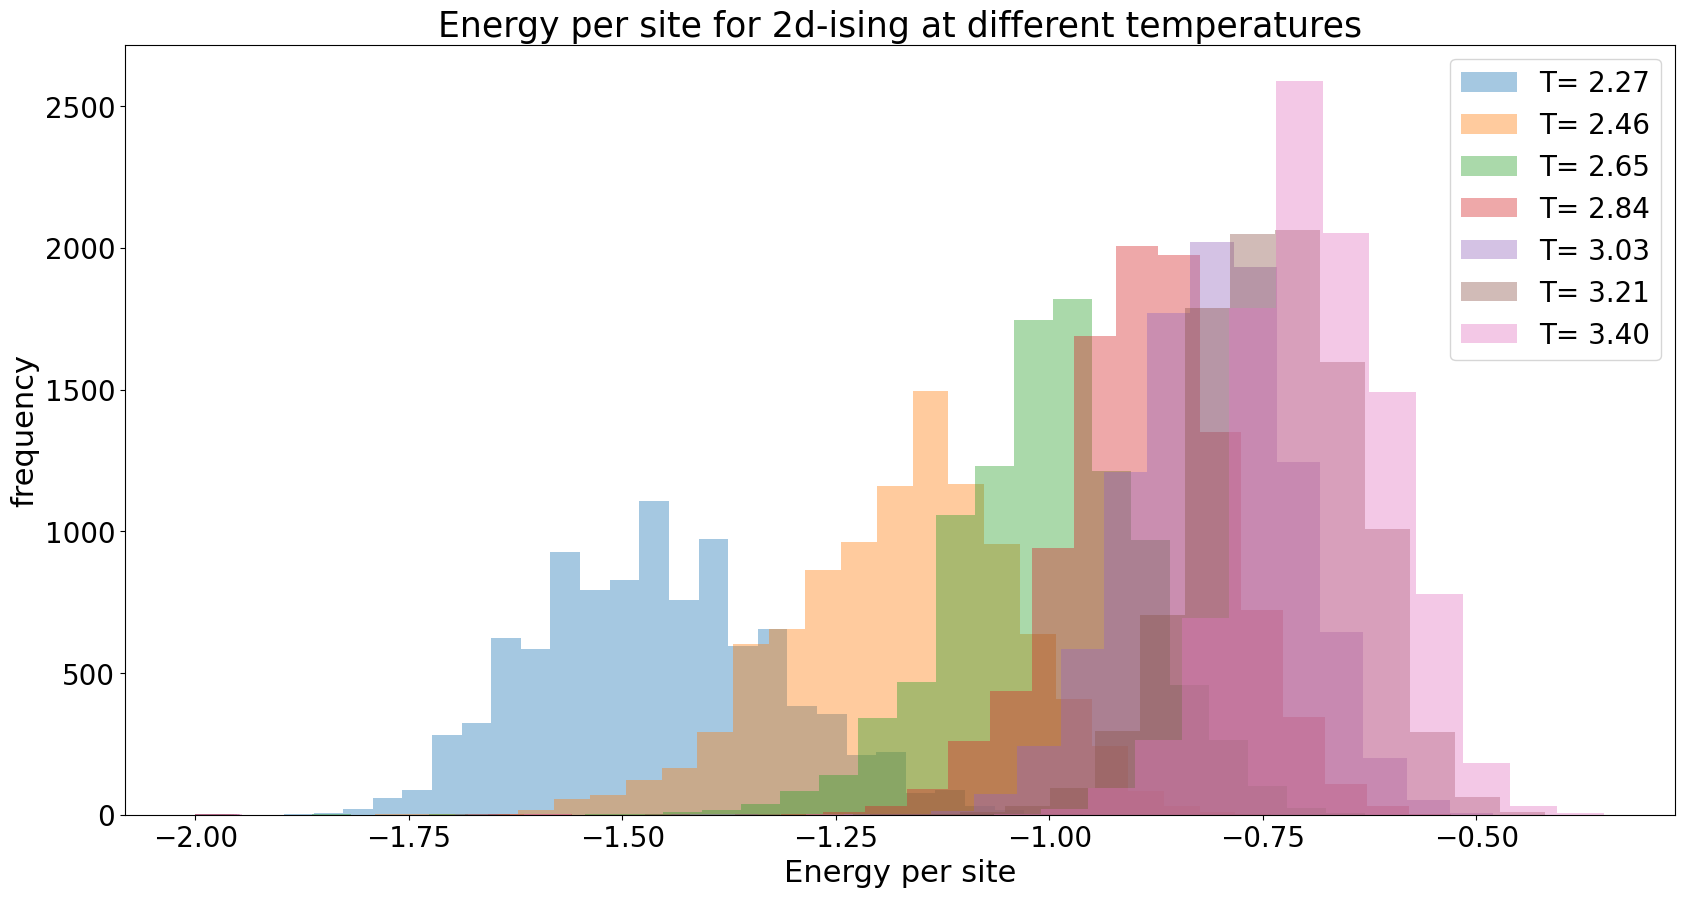

In [4]:
# plot the E hist at different temperature
plt.figure(figsize=(20,10))
for i in range(len(data)):
    T_cur = T[i]
    _,_,_ = plt.hist(data[i][:,1],bins=30, histtype ='stepfilled', alpha=0.4, label =f'T= {T_cur:.2f}' )
    
    avg_height = np.mean(data[i][:ts_plot, 1])
plt.title("Energy per site for 2d-ising at different temperatures", fontsize=25)
plt.xlabel('Energy per site', fontsize=22)
plt.ylabel('frequency', fontsize=22)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)
_ = plt.legend(loc='best',fontsize=20)


We want to try to extrapolate the average internal energy $U(\beta_j)=\langle E\rangle_{\beta_j}$ at every $\beta_j$ covering the selected $\beta_1,\ldots,\beta_K$ from data at this specific $\beta_{i \not = j}$. Let us consider the temperature $T_4 \sim 2.84$ as the starting point. We will try to estimate all the other 6 average energies from that fourth chain.

In [5]:
# We have just the simulation at temperature beta_c
beta_c = 1. / T[4]

# Store the differences btw real averages and single histogram method averages
results_err = []

# compute the N(E) (counts) and the corresponding E (bins)
counts, bins = np.histogram(data[4][:,1], bins=10000)

for i in range(len(data)):
     
    diff_betas = beta_c - 1./T[i]
    E = 0
    for a in range(counts.shape[0]):
        E = E + bins[a] * counts[a] * np.exp(diff_betas *  bins[a])

    Z = 0
    for b in range(counts.shape[0]):
        Z = Z + counts[b] * np.exp(diff_betas *  bins[b])

    results_err.append(np.mean(data[i][:ts_plot,1])- E / Z)
    #print(T[i], np.mean(data[i][:ts_plot,1]), E / Z)

Text(0, 0.5, 'Absolute error')

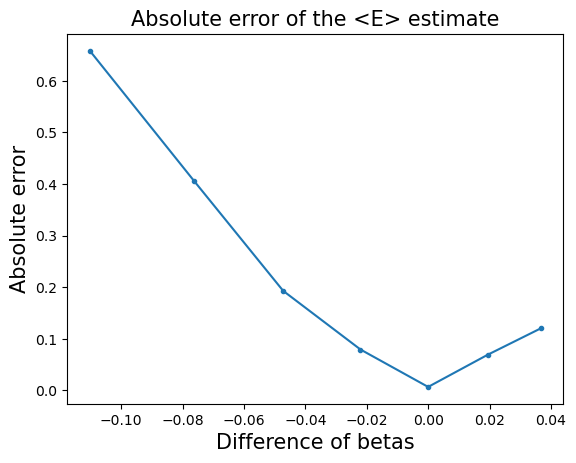

In [6]:
diff_betas = [beta_c - 1./T[i] for i in range(len(data))]#if i != 3]

plt.plot(diff_betas, np.abs(results_err),'.-')
plt.title("Absolute error of the <E> estimate", fontsize=15)
plt.xlabel('Difference of betas', fontsize=15)
plt.ylabel('Absolute error', fontsize=15)

Let us consider the temperature $T_7 \sim 3.4$ as the starting point instead. We will try to estimate all the other 6 average energies from that last chain.

In [7]:
# We have just the simulation at temperature beta_c
beta_c = 1. / T[6]

# Store the differences btw real averages and single histogram method averages
results_err = []

# compute the N(E) (counts) and the corresponding E (bins)
counts, bins = np.histogram(data[6][:,1], bins=10000)

for i in range(len(data)):
     
    diff_betas = beta_c - 1./T[i]
    E = 0
    for a in range(counts.shape[0]):
        E = E + bins[a] * counts[a] * np.exp(diff_betas *  bins[a])

    Z = 0
    for b in range(counts.shape[0]):
        Z = Z + counts[b] * np.exp(diff_betas *  bins[b])

    #print(T[i], np.mean(data[i][:ts_plot,1]), E / Z)
    results_err.append(np.mean(data[i][:ts_plot,1])- E / Z)


Text(0, 0.5, 'Absolute error')

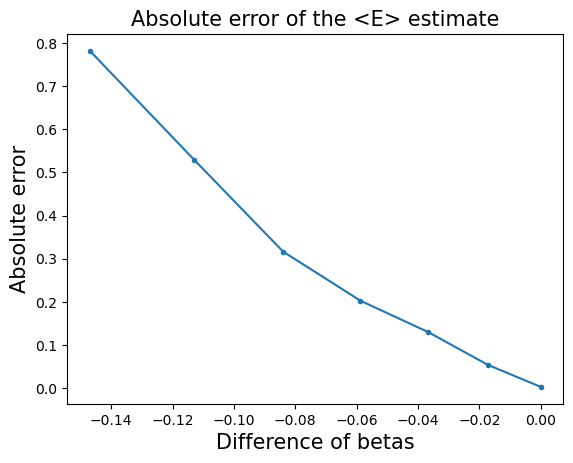

In [8]:
diff_betas = [beta_c - 1./T[i] for i in range(len(data))]#if i != 3]

plt.plot(diff_betas, np.abs(results_err),'.-')
plt.title("Absolute error of the <E> estimate", fontsize=15)
plt.xlabel('Difference of betas', fontsize=15)
plt.ylabel('Absolute error', fontsize=15)

Let us consider the temperature $T_0 \sim 2.27$ as the starting point instead. We will try to estimate all the other 6 average energies from that first chain.

In [9]:
# We have just the simulation at temperature beta_c
beta_c = 1. / T[0]

# Store the differences btw real averages and single histogram method averages
results_err = []

# compute the N(E) (counts) and the corresponding E (bins)
counts, bins = np.histogram(data[0][:,1],bins=10000)

for i in range(len(data)):
     
    diff_betas = beta_c - 1./T[i]
    E = 0
    for a in range(counts.shape[0]):
        E = E + bins[a] * counts[a] * np.exp(diff_betas *  bins[a])

    Z = 0
    for b in range(counts.shape[0]):
        Z = Z + counts[b] * np.exp(diff_betas *  bins[b])

    results_err.append(np.mean(data[i][:ts_plot,1])- E / Z)
    #print(T[i], np.mean(data[i][:ts_plot,1]), E / Z)


Text(0, 0.5, 'Absolute error')

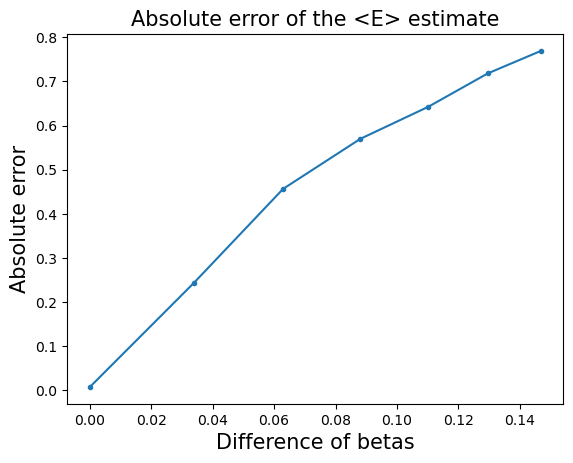

In [10]:
diff_betas = [beta_c - 1./T[i] for i in range(len(data)) ]

plt.plot(diff_betas, np.abs(results_err),'.-')
plt.title("Absolute error of the <E> estimate", fontsize=15)
plt.xlabel('Difference of betas', fontsize=15)
plt.ylabel('Absolute error', fontsize=15)

##### Discussion

The extrapolated average energy worsens when the inverse temperature deviates significantly from $beta_c$. In particular, we tested with three different $\beta_c$ values corresponding to $T_1, T_4$, and $T_7$:

- $T_1$: This temperature has the least overlapping distribution of energies. Consequently, the absolute error in estimating the average energy is immediately very high, even from the nearest chain.
- $T_4$ and $T_7$ At these temperatures, the corresponding chains exhibit more overlapping with the nearest chains, so the initial estimates of the average energy are not as poor.

Notice that the results are not satisfactory. This may be due to the fact that the chosen temperatures for the chain are too far apart. Additionally, the results depend to some extent on the number of bins selected for the computation. I also tried using one bin per measure, but this made the algorithm too slow in terms of performance.

### 12.3 Exercise: Multiple Histogram Method (MHM)

Following the previous point, now obtain $U(\beta)$ from the MHM based on all $\beta$'s data and comment on the new result.
 Then, use the MHM to compute the specific heat

$$
C(\beta)=\frac{1}{N\beta^{2}}[\left\langle E^{2}\right\rangle_{\beta}-\left\langle E\right\rangle_{\beta}^{2}]
$$

(note the normalization by the number $N$ of degrees of freedom) and for at least three system sizes.
Is the location $\beta_\mathrm{N}$ of $C(\beta)$'s maximum approaching a critical inverse temperature $\beta_\mathrm{c}$ for increasing system size?
 When counting data in histogranıs $N_i(E)$ and total measurements $M_i$, do you rescale them by the
 autocorrelation times $\tau_i$ of stored data?


##### MHM: Algorithm 
1) Perform M monte carlo simulations at different temperature $\beta_k$ and save  $E_k$(as a list). 

2) Start from an initial guess for the `Zk = [1,1,...,1]`. Use this formula iteratively to compute each $Z_k$, the partition function at temperature $\beta_k, \forall k$:

$$
\begin{gathered}
Z_{k} =\sum_{E}\frac{\sum_{i}N_{i}(E)}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta_{k}-\beta_{j})E}} \\
=\sum_{i,E}\frac{N_{i}(E)}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta_{k}-\beta_{j})E}} \\
=\sum_{i.n}\frac{1}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta_{k}-\beta_{j})E_{in}}} 
\end{gathered}
$$
 
where the index $n$ runs over all samples $M_i$ of the $i$-th simulation, and $E_{in}$ is the energy of such sample $n$. If needed rescale the $Z_k$ by this factor:
$$A=\left[\min_k(Z_k)\max_k(Z_k)\right]^{-1/2}.$$

3) Compute the partition function at $\beta$:
$$
\begin{aligned}
&Z(\beta) =\sum_{i,n}\frac{1}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta-\beta_{j})E_{in}}}  \\
\end{aligned}
$$

4) Every other observable is computed similarly:

$$
\begin{aligned}
&O(\beta) =\frac{1}{Z(\beta)}\sum_{i,n}\frac{O_{in}}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta-\beta_{j})E_{in}}} 
\end{aligned}
$$

 where $O_{in}$ is the value of the observable of sample $n$ in the $i$ -th simulation.
 

## Data preprocessing 

- Load the data of the Ising model simulation with $L=20,30,50$;
- Extract just the energy column from that data;
- Compute the autocorrelation time for each chain and rescale the data accordingly

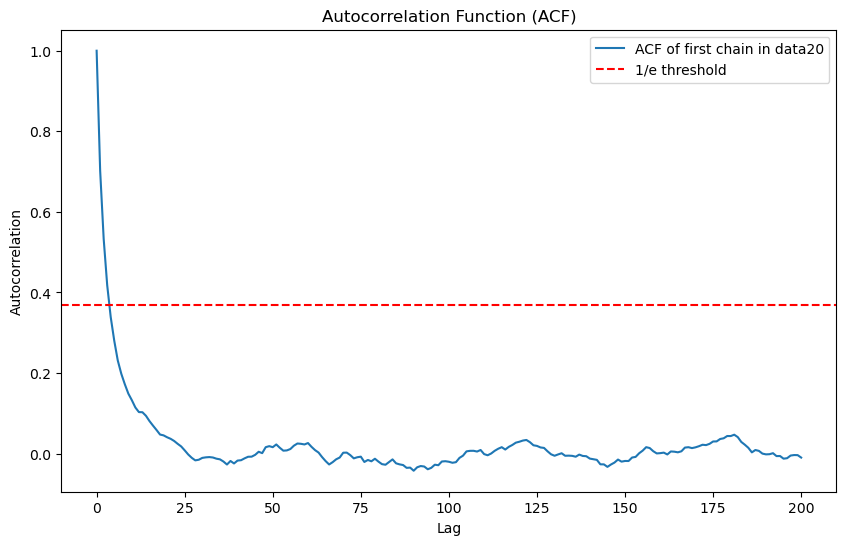

Autocorrelation times for data20:
[8, 28, 22, 6, 4, 4, 4]

Autocorrelation times for data30:
[8, 68, 14, 6, 6, 4, 4]

Autocorrelation times for data50:
[248, 16, 10, 6, 4, 4, 4]


In [418]:
###################################
######## Load the data ###########

# Path to the folder containing the files
base_path20 = "/home/gloria/Scrivania/Numerical methods soft matter/12Exercise/20"
base_path30 = "/home/gloria/Scrivania/Numerical methods soft matter/12Exercise/30"
base_path50 = "/home/gloria/Scrivania/Numerical methods soft matter/12Exercise/50"

# List of file names
file_names = ["single_hist_1.txt", "single_hist_2.txt", "single_hist_3.txt",
              "single_hist_4.txt", "single_hist_5.txt", "single_hist_6.txt",
              "single_hist_7.txt"]

data20 = []
for file_name in file_names:
    full_path = f"{base_path20}/{file_name}"
    with open(full_path, 'r') as file:
        file_data = np.loadtxt(file)
        data20.append(file_data)
        
data30 = []       
for file_name in file_names:
    full_path = f"{base_path30}/{file_name}"
    with open(full_path, 'r') as file:
        file_data = np.loadtxt(file)
        data30.append(file_data)

data50 = []
for file_name in file_names:
    full_path = f"{base_path50}/{file_name}"
    with open(full_path, 'r') as file:
        file_data = np.loadtxt(file)
        data50.append(file_data)
        
        
###################################
######## Extract energy ###########
data20_e = [data20[i][:,1]*20**2 for i in range(7)]
data30_e = [data30[i][:,1]*20**2 for i in range(7)]
data50_e = [data50[i][:,1]*20**2 for i in range(7)]


###################################
######### Compute acf #############
from statsmodels.tsa.stattools import acf

def compute_acf(data, nlags=200):
    acfs = []
    for chain in data:
        acf_values = acf(chain, nlags=nlags)
        acfs.append(acf_values)
    return acfs

def compute_autocorrelation_time(acf_values):
    """Compute the autocorrelation time based on the point where ACF decays to 1/e."""
    threshold = 1 / np.exp(1)
    for lag, value in enumerate(acf_values):
        if value < threshold:
            tau = lag
            break
    else:
        tau = len(acf_values)  # if no such point is found within nlags, use the max lag
    return 2 * tau

# compute ACF for each set of data
acf20 = compute_acf(data20_e)
acf30 = compute_acf(data30_e)
acf50 = compute_acf(data50_e)

# compute autocorrelation time for each set of data
tau20 = [compute_autocorrelation_time(acf_chain) for acf_chain in acf20]
tau30 = [compute_autocorrelation_time(acf_chain) for acf_chain in acf30]
tau50 = [compute_autocorrelation_time(acf_chain) for acf_chain in acf50]

# as an example: Plot ACF for the first chain in data20_e
plt.figure(figsize=(10, 6))
plt.plot(acf20[0], label='ACF of first chain in data20')
plt.axhline(y=1/np.exp(1), color='r', linestyle='--', label='1/e threshold')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.title('Autocorrelation Function (ACF)')
plt.show()

# print the autocorrelation times
print("Autocorrelation times for data20:")
print(tau20)
print("\nAutocorrelation times for data30:")
print(tau30)
print("\nAutocorrelation times for data50:")
print(tau50)


###################################
##### Subsample the data #########

def subsample_data(data, taus):
    """Subsample data according to the computed autocorrelation times."""
    subsampled_data = []
    for chain, tau in zip(data, taus):
        subsampled_chain = chain[::tau]
        subsampled_data.append(subsampled_chain)
    return subsampled_data

data20 = subsample_data(data20_e, tau20)
data30 = subsample_data(data30_e, tau30)
data50 = subsample_data(data50_e, tau50)

## Internal energy analysis

In [390]:
def rescale_z(x):
    minimum = np.min(x)
    maximum = np.max(x)
    A = 1.0 / np.sqrt(minimum * maximum)
    x_new = [val * A for val in x]
    return x_new

def convergence(Z_k_new, Z_k_old):
    delta = [( (Z_k_new[k] - Z_k_old[k]) / Z_k_new[k] )**2 for k in range(len(Z_k_new))]
    return np.sum(delta)

 ###### 1), 2) compute $Z_k$

In [391]:
def compute_partition_functions(data20, T_critic, num_iterations=500, tolerance=1e-5,verbose=False):
    # Define M vector
    M = []
    for j in range(len(data20)): 
        M.append(data20[j].shape[0])
    
    # Define the betas
    T = np.linspace(T_critic, 1.5 * T_critic, 7)
    betas = 1 / T
    num_temperatures = len(T)

    # Initializing partition functions Z for each temperature
    Z_old = np.ones(num_temperatures)  # Start with ones to avoid division by zero
    Z_new = np.ones(num_temperatures)

    # Main loop for iterations
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}")
        for k in range(num_temperatures):  # Compute Z at a given temperature k
            summation = 0
            for i in range(num_temperatures):
                for n in range(data20[i].shape[0]):
                    denominator_sum = 0
                    for j in range(num_temperatures):
                        E_in = data20[i][n]
                        denominator_sum += M[j] * (1 / Z_old[j]) * np.exp((betas[k] - betas[j]) * E_in)
                    summation += 1.0 / denominator_sum
            Z_new[k] = summation
        
        # Check for convergence
        if convergence(Z_new, Z_old) < tolerance**2:
            break    
        
        # Update Z_old with Z_new for the next iteration
        Z_new = rescale_z(Z_new)
        Z_old = Z_new.copy()
        if verbose:
            print(f"Z_new after iteration {iteration + 1}: {Z_new}")

    # Final Z values
    Z_final = Z_new
    print(f"Final Z values: {Z_final}")
    return Z_final

Z_final = compute_partition_functions(data20, T_critic)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

###### 3) compute $Z_{\beta}$

In [392]:
def compute_Z_beta(num_temperatures, M, data20, Z_k, betas, beta):
    Z_beta = 0.0

    for i in range(len(Z_k)):
        for n in range(data20[i].shape[0]):
            denominator = 0.0
            for j in range(len(Z_k)):
                denominator += M[j] * np.exp((beta - betas[j]) * data20[i][n]) / Z_k[j]
            Z_beta += 1.0 / denominator

    return Z_beta


###### 4) compute $U(\beta)$

In [393]:
def compute_E_beta(data, num_temperatures,  M, betas, Z_k, Z_beta, beta):
    E_beta = 0.0
    
    for i in range(len(Z_k)):
        for n in range(data[i].shape[0]):
            denominator = 0.0
            for j in range(len(Z_k)):
                denominator +=  M[j] / Z_k[j] * np.exp((beta - betas[j]) * data[i][n])
            E_beta += data[i][n] / denominator
    
    E_beta /= Z_beta
    return E_beta

###### Apply 3), 4) recursively for a large number of $\beta$

In [394]:
# define the matrix of the number of measurements
M = []
for j in range(len(data20)): 
    M.append(data20[j].shape[0])
M

[1250, 358, 455, 1667, 2500, 2500, 2500]

In [399]:
# define a set of new beta, where you want to compute the observable
n = 20
T_critic = 2.269
T_expanded = np.linspace(0.8*T_critic, 2.5*T_critic, n)
beta_expanded = 1/T_expanded

# list to store the values of E
E_expanded = []

for beta in beta_expanded:
    
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, data20, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(data20, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E_expanded.append(E_beta/20**2)


In [401]:
# define the average internal enegy estimated via simulation
T = np.linspace(0.9*T_critic, 1.5*T_critic, 7)
mean = [np.mean(data20[:][i]/20**2) for i in range(7)]

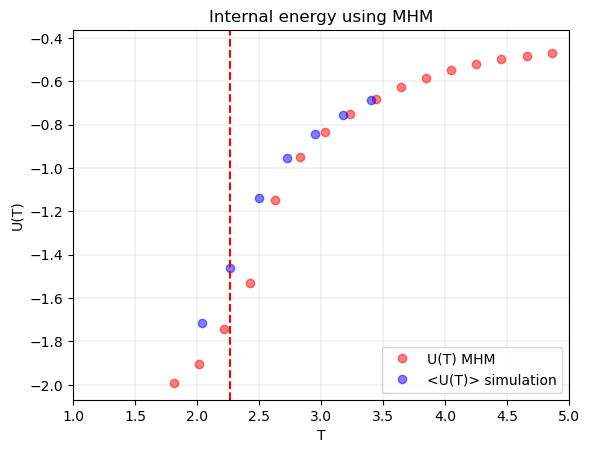

In [403]:
# plot internal enegy estimates via MHM vs the simulated mean
plt.plot(T_expanded,E_expanded,'ro', label='U(T) MHM', alpha=0.5)
plt.plot(T,mean,'bo',label='<U(T)> simulation',alpha=0.5)
plt.title('Internal energy using MHM')
plt.xlabel('T')
plt.ylabel('U(T)')
plt.legend()
plt.xlim(1,5)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

###### Zoom out of the previous simulation

In [411]:
# define a set of new beta, where you want to compute the observable
n = 40
T_critic = 2.269
T_expanded = np.linspace(0.5*T_critic, 3.5*T_critic, n)
beta_expanded = 1/T_expanded

# list to store the values of E
E_expanded = []

for beta in beta_expanded:
    
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, data20, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(data20, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E_expanded.append(E_beta/20**2)

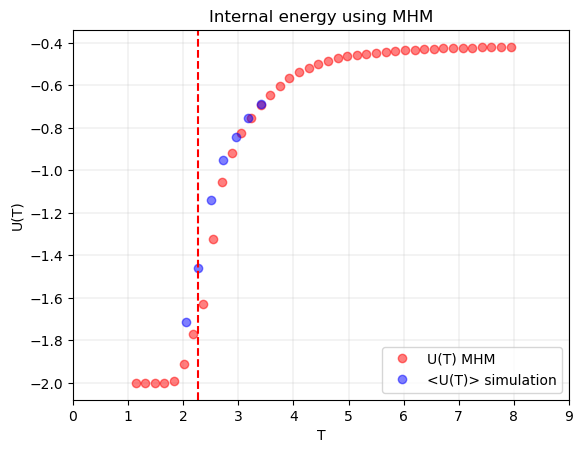

In [412]:
# plot internal enegy estimates via MHM vs the simulated mean
plt.plot(T_expanded,E_expanded,'ro', label='U(T) MHM', alpha=0.5)
plt.plot(T,mean,'bo',label='<U(T)> simulation',alpha=0.5)
plt.title('Internal energy using MHM')
plt.xlabel('T')
plt.ylabel('U(T)')
plt.legend()
plt.xlim(0,9)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

### Discussion on $U(\beta)$

The results for the internal energy $U(\beta)$ are quite satisfactory. The estimated observable approximate well, even if not perfectly, the results of the simulation. Notice that:
- the threshold $\epsilon$ for computing the partition function $Z_k$ was lowered in order to speed up convergence
- the data from the simulation was collected around the critical temperature, as other intervals proved to yield worse results.
- the algorithm for the computation of $U$ is quite fast.

##  Specific heat analysis for various lattice sizes

In the following piece of code, we have implemented the computation of the specific heat using the Multiple Histogram Method (MHM). This method allows us to efficiently combine data from multiple simulations performed at different temperatures to obtain accurate estimates of thermodynamic quantities over a continuous range of temperatures.

The specific heat $C$ can be computed using the fluctuations in energy. Specifically, the formula for specific heat is:
$$
   C = \frac{\partial \langle E \rangle}{\partial T} = \frac{\langle E^2 \rangle - \langle E \rangle^2}{k_B T^2}
$$
   - $\langle E \rangle_\beta$: This is the average energy at a given inverse temperature $ \beta = \frac{1}{k_B T} $. This value has been computed from our previous computation (see `compute_E_beta` function).
   - $\langle E^2 \rangle_\beta$: This is the average of the squared energies at the given inverse temperature $ \beta $. This is the quantity we need to compute now (see `compute_E2_beta` function).


In [413]:
#compute <E^2>_β

def compute_E2_beta(data_e, num_temperatures, M, betas, Z_k, Z_beta, beta):
    E2_beta = 0.0
    
    for i in range(len(Z_k)):
        for n in range(data_e[i].shape[0]):
            denominator = 0.0
            for j in range(len(Z_k)):
                denominator += M[j] / Z_k[j] * np.exp((beta - betas[j]) * data_e[i][n])
            E2_beta += data_e[i][n]**2 / denominator
    
    E2_beta /= Z_beta
    return E2_beta

#### Specific heat for $L=20$

In [417]:
# define a set of new beta, where you want to compute the observable
n = 20
T_critic = 2.269
T_expanded = np.linspace(0.5*T_critic, 2*T_critic, n)
beta_expanded = 1/T_expanded

# list to store the values of E
C_expanded20 = []

for k, beta in enumerate(beta_expanded):
    
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, data20, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(data20, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E2_beta = compute_E2_beta(data20, num_temperatures, M, betas, Z_final, Z_beta, beta)
    C_expanded20.append((E2_beta-E_expanded[k]**2)/(20**2*beta**2))

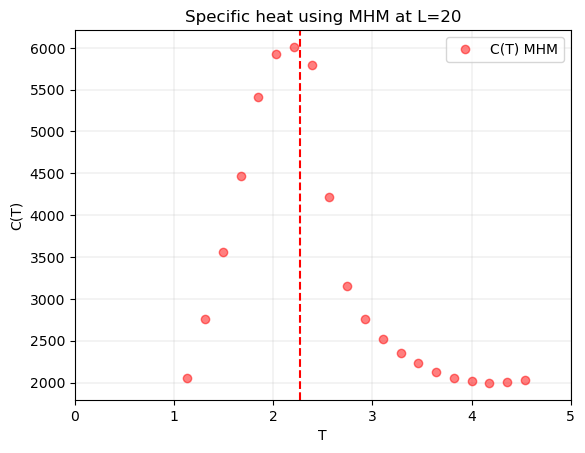

In [435]:
plt.plot(T_expanded,C_expanded20,'ro',label='C(T) MHM',alpha=0.5)
plt.title('Specific heat using MHM at L=20')
plt.xlabel('T')
plt.ylabel('C(T)')
plt.legend()
plt.xlim(0,5)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

#### Specific heat for $L=30$

In [419]:
# recompute partition function
Z_final = compute_partition_functions(data30, T_critic)

# define the matrix of the number of measurements
M = []
for j in range(len(data30)): 
    M.append(data30[j].shape[0])
M

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

[1250, 148, 715, 1667, 1667, 2500, 2500]

In [424]:
# define a set of new beta, where you want to compute the observable
n = 20
T_critic = 2.269
T_expanded = np.linspace(0.5*T_critic, 2*T_critic, n)
beta_expanded = 1/T_expanded

# list to store the values of E
C_expanded30 = []

for k, beta in enumerate(beta_expanded):
    
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, data30, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(data30, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E2_beta = compute_E2_beta(data30, num_temperatures, M, betas, Z_final, Z_beta, beta)
    C_expanded30.append((E2_beta-E_expanded[k]**2)/(20**2*beta**2))

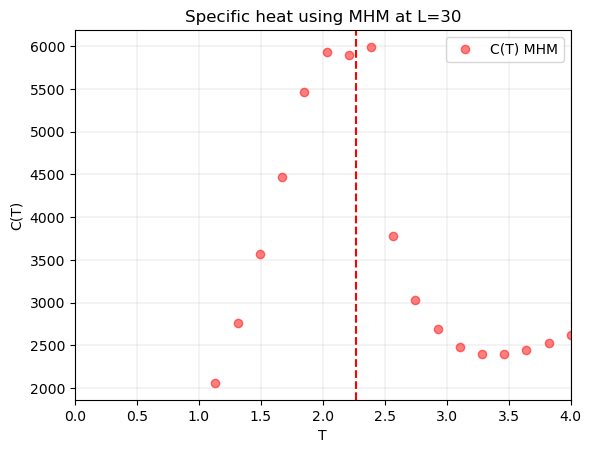

In [426]:
plt.plot(T_expanded,C_expanded30,'ro',label='C(T) MHM',alpha=0.5)
plt.title('Specific heat using MHM at L=30')
plt.xlabel('T')
plt.ylabel('C(T)')
plt.legend()
plt.xlim(0,4)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

#### Specific heat for $L=50$

In [427]:
# recompute partition function
Z_final = compute_partition_functions(data50, T_critic)

# define the matrix of the number of measurements
M = []
for j in range(len(data50)): 
    M.append(data50[j].shape[0])
M

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Final Z values: [1604611541917.6956, 117936.96534612722, 0.6476766053287687, 6.29749585792024e-05, 4.169732183023896e-08, 1.01404367952003e-10, 6.232082057659452e-13]


[1250, 148, 715, 1667, 1667, 2500, 2500]

In [440]:
# define a set of new beta, where you want to compute the observable
n = 20
T_critic = 2.269
T_expanded = np.linspace(0.5*T_critic, 2*T_critic, n)
beta_expanded = 1/T_expanded

# list to store the values of E
C_expanded50 = []

for k, beta in enumerate(beta_expanded):
    
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, data50, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(data50, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E2_beta = compute_E2_beta(data50, num_temperatures, M, betas, Z_final, Z_beta, beta)
    C_expanded50.append((E2_beta-E_expanded[k]**2)/(20**2*beta**2))

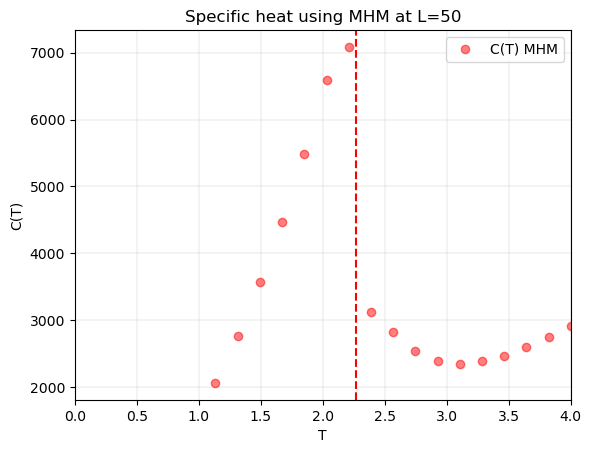

In [441]:
plt.plot(T_expanded,C_expanded50,'ro',label='C(T) MHM',alpha=0.5)
plt.title('Specific heat using MHM at L=50')
plt.xlabel('T')
plt.ylabel('C(T)')
plt.legend()
plt.xlim(0,4)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

#### Specific heat extrapolated with MHM with different L

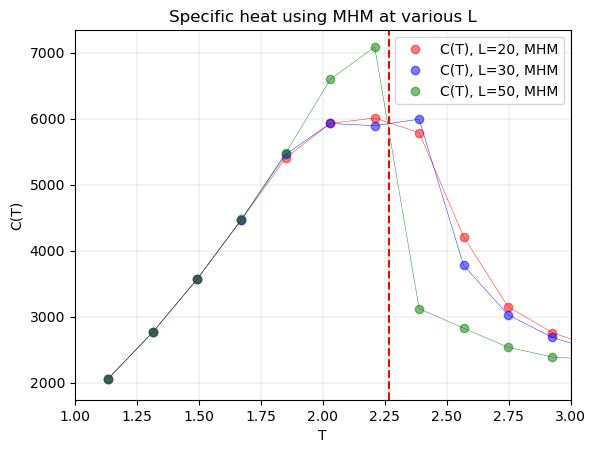

In [442]:
# Final plot
plt.plot(T_expanded, C_expanded20, 'ro', label='C(T), L=20, MHM', alpha=0.5)
plt.plot(T_expanded, C_expanded30, 'bo', label='C(T), L=30, MHM', alpha=0.5)
plt.plot(T_expanded, C_expanded50, 'go', label='C(T), L=50, MHM', alpha=0.5)

plt.plot(T_expanded, C_expanded20, 'r-', linewidth=0.3)
plt.plot(T_expanded, C_expanded30, 'b-', linewidth=0.3)
plt.plot(T_expanded, C_expanded50, 'g-', linewidth=0.3)

plt.title('Specific heat using MHM at various L')
plt.xlabel('T')
plt.ylabel('C(T)')
plt.legend()
plt.xlim(1,3)
plt.axvline(x=T_critic, color='r', linestyle='--', label=f'T_critic = {T_critic}')
plt.grid(linewidth=0.2)

### Discussion on $C(\beta)$

The results for the specific heat $C(\beta)$ are good. The estimated observable approximate well, even if not perfectly, the expectation. Notice that:
- the specific heat is peaked around the critical temperature, for all values of the lattice size as expected;
- the algorithm for the computation of $C$ is quite fast.
- The left tail of the simulations of $ C $ coincides for all three lattice sizes. Maybe this can be due to the fact that I sampled most of the data (energies) on the right side wrt the critical temperature.

**Further improvements** involve implementing the log sum exp trick to compute the partition function. This technique allows for a more efficient calculation, particularly enabling the expansion of the sampling domain to include temperatures below the critical temperature. Without using this trick, the partition function Z can become respectivly too small and too large at temperatures far from the critical point, which hinders accurate sampling and calculation.
